<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 800>

# Final Project 4 - Clustering

**NAFIATUL RISA / PYTH-KS09-022**

# Latar Belakang

Project ini digunakan untuk melihat customer segmentation dari data credit card. Data dapat diakses pada link (https://www.kaggle.com/arjunbhasin2013/ccdata).

# Objective

Final Project 3 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import pickle

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Loading

**Menampilkan 5 data teratas dan 5 data terbawah.**

In [2]:
df= pd.read_csv('./dataset/CC GENERAL.csv')

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Menampilkan jumlah data non-null dan tipe data dari masing-masing kolomnya**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Dimension of dataframe**

In [4]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
8950 baris
18 kolom


**Index dataframe**

In [5]:
df.index

RangeIndex(start=0, stop=8950, step=1)

**View column names**

In [6]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**View number unique data**

In [7]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

**Display unique value**

In [8]:
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
--------------------------------------------------------------------------------
Nilai Unique Kolom BALANCE
[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
--------------------------------------------------------------------------------
Nilai Unique Kolom BALANCE_FREQUENCY
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
--------------------------------------------------------------------------------
Nilai Unique Kolom PURCHASES
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
-----------------------------------------------------------

**View number of missing value**

In [9]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values(ascending=False) #Check if any column has null values

Jumlah Missing Value tiap column: 


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**Check duplicate data**

In [10]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) 

Jumlah Duplicate Data  0


**View Basic statistic numerical column**

In [11]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Analisis :**

Berdasarkan hasil diatas, ditemukan bahwa :
1. Dimensi data sejumlah 8950 baris dan 18 kolom. 
2. Terdapat 2 type data, yaitu float sejumlah 14 kolom, integer sejumlah 3 kolom, dan object sejumlah 1 kolom.
3. Terdapat missing value pada kolom MINIMUM_PAYMENTS dan CREDIT_LIMIT.
4. Tidak terdapat duplicate data.

Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# Data Cleaning

**View number of missing value**

In [12]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values(ascending=False) #Check if any column has null values

Jumlah Missing Value tiap column: 


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom MINIMUM_PAYMENT dan CREDIT LIMIT, missing value pada kolom MINIMUM_PAYMENT tersebut akan di inputasi dengan nilai rata-rata datanya. Pada kolom CREDIT LIMIT, missing value akan di drop, karena hanya 1 data saja yang terdapat missing value. 

In [13]:
# Mengganti missing value di kolom MINIMUM_PAYMENTS dengan nilai rata-rata kolom
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace = True)

In [14]:
# Menghapus data yang terdapat missing value pada kolom CREDIT_LIMIT
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [15]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values(ascending=False) #Check if any column has null values

Jumlah Missing Value tiap column: 


CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

CUST_ID adalah unique id yang dimiliki masing-masing customer. CUST_ID tidak dibutuhkan dalam project ini, sehingga CUST_ID akan di hapus.

**DROP CUST_ID**

In [16]:
df.drop(['CUST_ID'], axis=1, inplace=True)

# Exploratory Data Analysis

**Questions :** Bulan dengan Tenure tertinggi.

**Pre-processing as needed :**

In [17]:
tenure_dist = df.groupby("TENURE").size().sort_values(ascending = False)
tenure_dist

TENURE
12    7584
11     365
10     236
6      203
8      196
7      190
9      175
dtype: int64

**Visualization :**

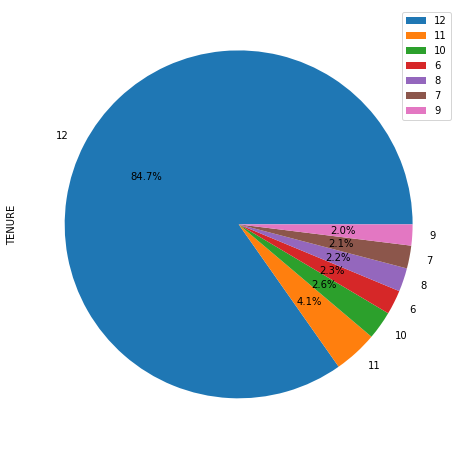

In [18]:
df_tenure=pd.DataFrame(df['TENURE'].value_counts())
plot = df_tenure.plot.pie(y='TENURE', figsize=(8, 8),autopct="%1.1f%%");

**Analisis :**

Berdasarkan visualisasi diatas, tenure tertinggi yaitu 12 bulan.

**Questions :** Seberapa sering saldo customer diperbaharui?

**Pre-processing as needed :**

In [19]:
df_vis=pd.DataFrame()
df_vis["BALANCE_FREQUENCY"] = np.where(df["BALANCE_FREQUENCY"] < 1, "not frequently updated", "frequently updated")

**Visualization :**

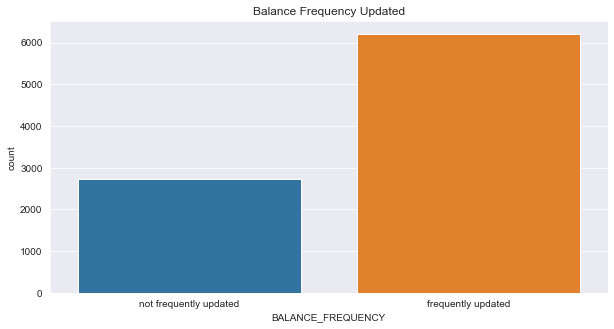

In [20]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('Balance Frequency Updated')
sns.countplot(x=df_vis["BALANCE_FREQUENCY"]);

**Analisis :**

Berdasarkan visualisasi diatas, sebagian besar customer sering memperbaharui saldo yang mereka miliki.

**Questions :** Seberapa sering customer melakukan pembelian?

**Pre-processing as needed :**

In [21]:
df_vis["PURCHASES_FREQUENCY"] = np.where(df["PURCHASES_FREQUENCY"] < 1, "not frequently purchased", "frequently purchased")

**Visualization :**

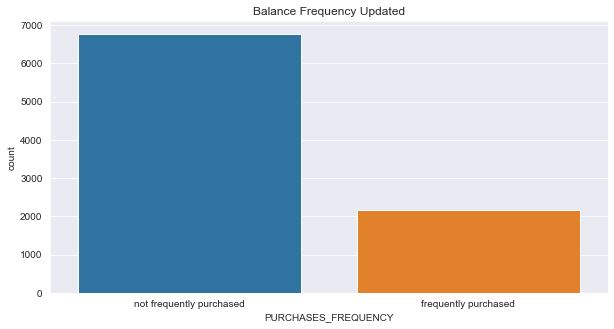

In [22]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('Balance Frequency Updated')
sns.countplot(x=df_vis["PURCHASES_FREQUENCY"]);

**Analisis :**

Berdasarkan visualisasi diatas, sebagian besar customer tidak sering melakukan pembelian.

**Question :** Bagaimana distribusi skewness pada data?

**Visualization :**

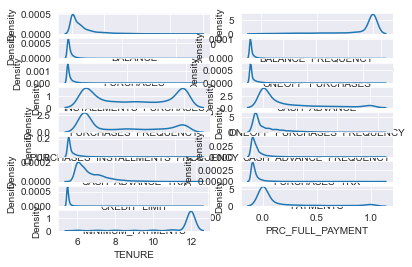

In [23]:
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

**Analisis :**

Ada banyak skewness yang bervariasi pada data. Sehingga saya akan menangani skewness agar clustering nanti semakin baik.

**Question :** Bagaimana korelasi antar data?

**Visualization :**

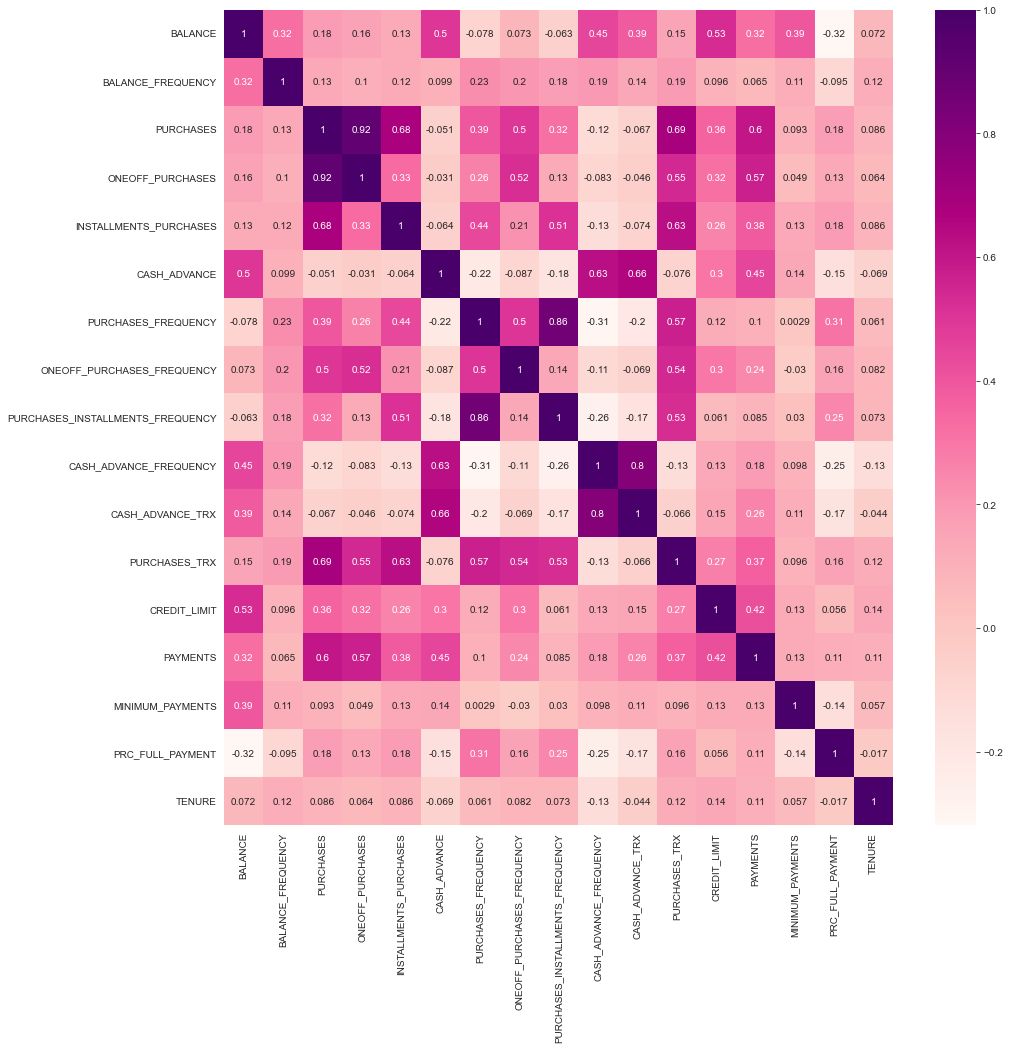

In [24]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), annot=True, cmap="RdPu")

**Analisis :**

Beberapa variabel memiliki nilai korelasi sedang hingga tinggi terhadap variabel lain.

**Question :** Bagaimana outlier pada data?

**Visualization :**

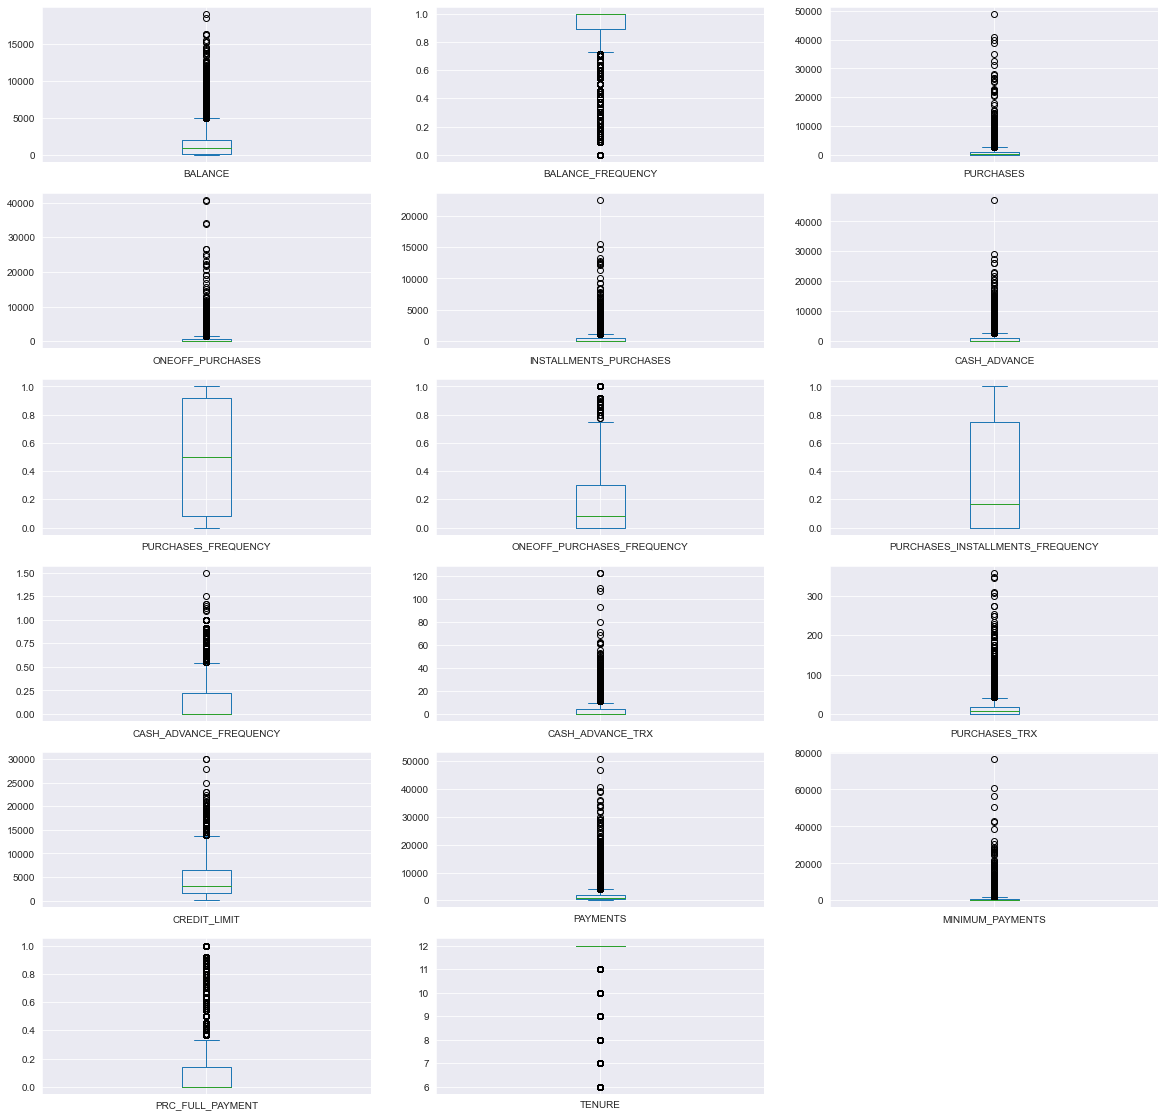

In [25]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20));

**Analisis :**

Banyak sekali outlier pada data. Nantinya outlier ini akan saya hapus.

# Data Preprocessing

**Handle the Skewness**

In [26]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [27]:
for col in cols:
    df[col] = np.log(1 + df[col])

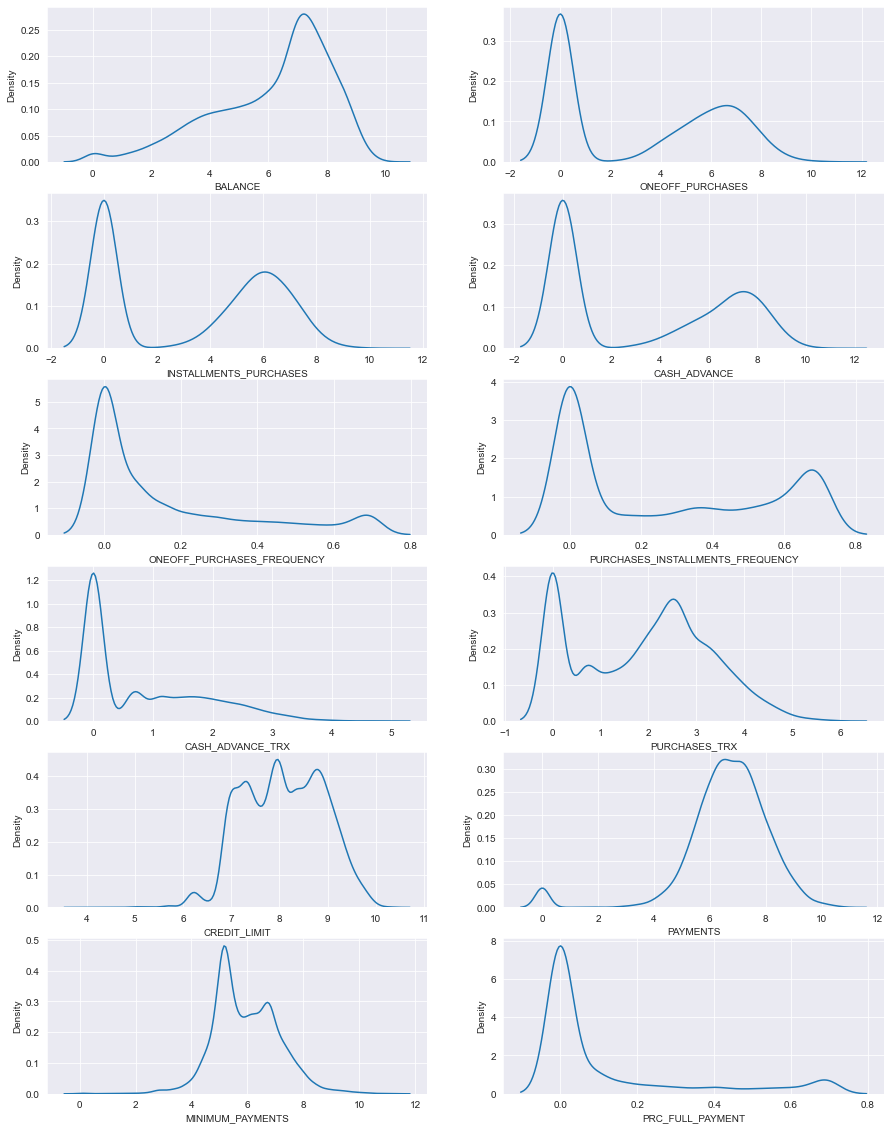

In [28]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

**Handle Outlier using Standart Deviation**

In [29]:
for col in df.columns: 
    mean = df[col].mean()
    sd = df[col].std()
    df = df[(df[col] <= mean+4*sd)]

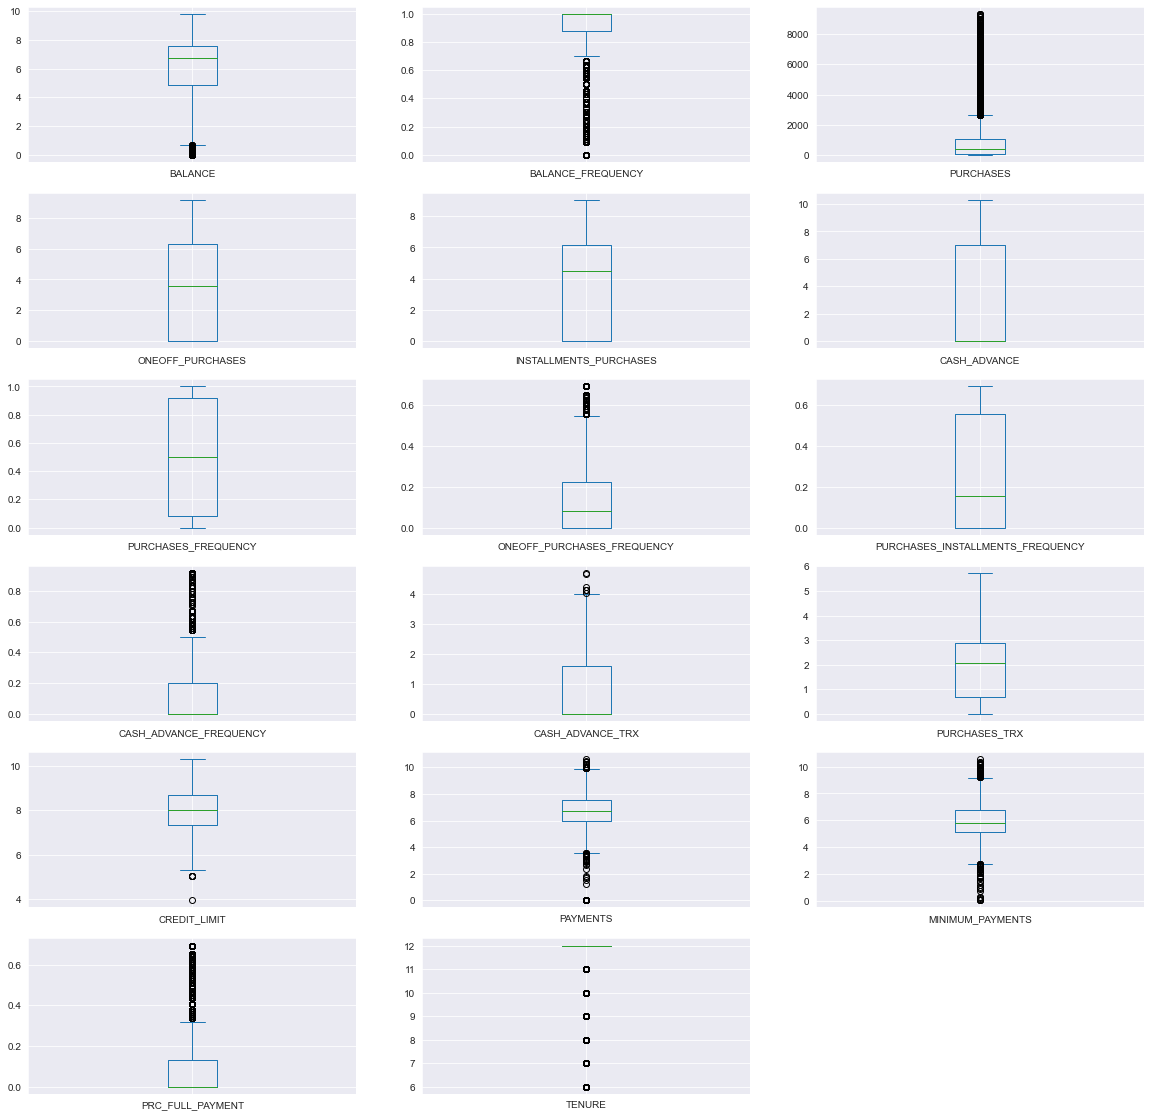

In [30]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20));

Meskipun tidak semua outlier teratasi. Namun Outlier sudah tidak separah sebelumnya dimana outlier tiap kolom sudah berkurang.



# Modelling

In [32]:
# Scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8830, 17)

**Elbow Method : untuk menentukan cluster yang akan digunakan.**

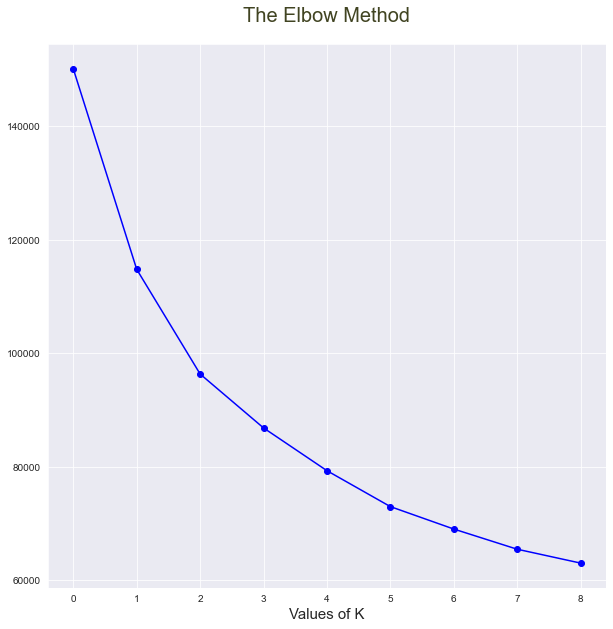

In [35]:
scores_1 = []
range_values = range(1,10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize = (10,10)) 
plt.plot(scores_1, 'bx-', marker = 'o')
plt.xlabel('Values of K', fontsize = 15)
plt.title('The Elbow Method',fontsize = 20, color = '#414422', y = 1.03);


Berdasarkan visualisasi elbow method nilai n sepertinya pada elbow n=3.

In [38]:
kmeans = KMeans(3)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # Labels (cluster) associated to each data point

kmeans.cluster_centers_.shape

(3, 17)

In [39]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,
                               columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.918541,-0.561167,-0.302260,-0.320554,0.269171,-0.800442,0.159864,-0.407276,0.263154,-0.634361,-0.733748,0.082057,-0.361956,-0.495015,-0.629389,0.340531,-0.075654
1,0.587211,0.209640,-0.533289,-0.487488,-0.831097,0.978075,-0.918797,-0.493206,-0.784337,0.801001,0.901882,-0.938936,-0.019481,0.063498,0.410806,-0.421149,-0.116917
2,0.408994,0.434738,1.035367,1.001226,0.697239,-0.221816,0.941285,1.115668,0.646712,-0.207859,-0.209907,1.062570,0.472215,0.534044,0.269773,0.100625,0.238611


In [40]:
# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4.288255,0.742461,464.315994,2.129561,4.148016,0.464518,0.551484,0.068335,0.342295,0.010152,0.079154,1.985067,7.786353,5.817537,5.201085,0.188216,11.419345
1,7.316142,0.925824,157.738507,1.593228,0.778560,6.793310,0.119294,0.049965,0.047748,0.286737,1.711112,0.603382,8.064803,6.695507,6.414943,0.027959,11.364358
2,6.957768,0.979371,2239.361583,6.376244,5.458931,2.523537,0.864579,0.393910,0.450148,0.092336,0.601819,3.311971,8.464576,7.435194,6.250364,0.137740,11.838125


In [41]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([2, 1, 0, ..., 2, 2, 2])

In [42]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12.0,0.0
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12.0,1.0
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12.0,2.0
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12.0,1.0
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12.0,0.0


In [43]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-0.44263855, -2.74324187],
       [-3.06812697,  1.13413421],
       [ 1.32148675,  1.22807766],
       ...,
       [ 0.90811552, -3.36878304],
       [-2.39902135, -3.67387915],
       [-0.32787515, -0.55545933]])

In [53]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.442638,-2.743241
1,-3.068127,1.134134
2,1.321487,1.228078
3,-1.619327,-0.698314
4,-1.121702,-1.310011


In [54]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.442638,-2.743241,3
1,-3.068127,1.134134,0
2,1.321487,1.228078,1
3,-1.619327,-0.698314,3
4,-1.121702,-1.310011,3


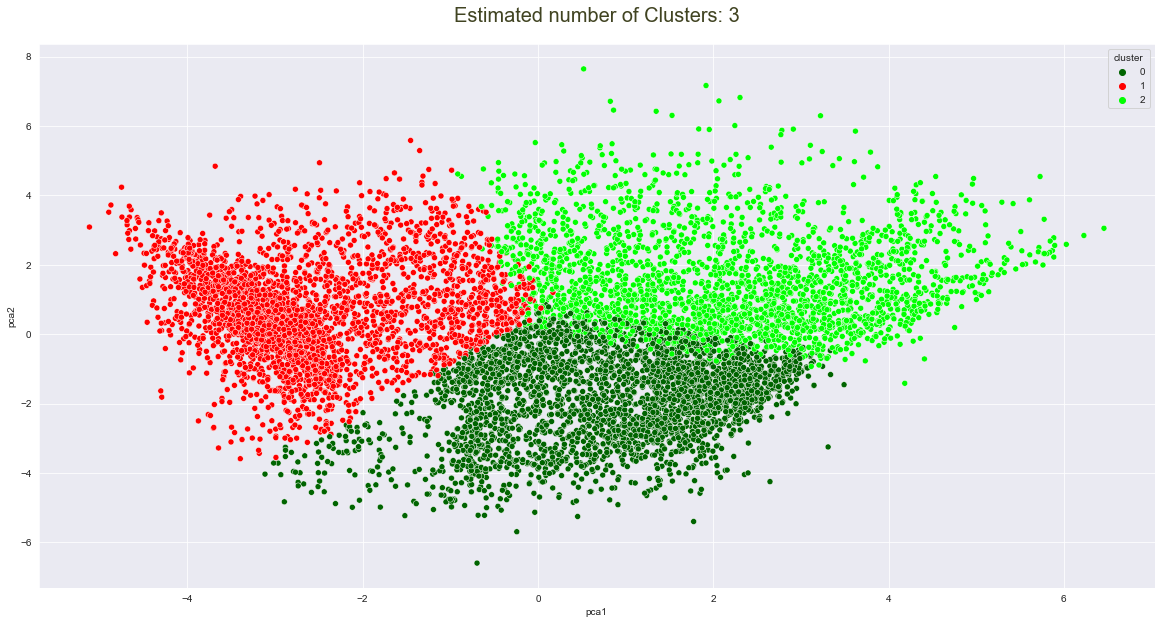

In [50]:
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df, 
                     palette = ['darkgreen', 'red', 'lime'])
plt.title('Estimated number of Clusters: 3', fontsize = 20, color='#414422', y=1.03)
plt.show();

In [55]:
# Let's try the model with 4 clusters
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_ 

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])

# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])

y_kmeans = kmeans.fit_predict(df_scaled)

# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

pca_df.head()

,pca1,pca2,cluster
0,-0.442638,-2.743241,2
1,-3.068127,1.134134,1
2,1.321487,1.228078,0
3,-1.619327,-0.698314,2
4,-1.121702,-1.310011,2


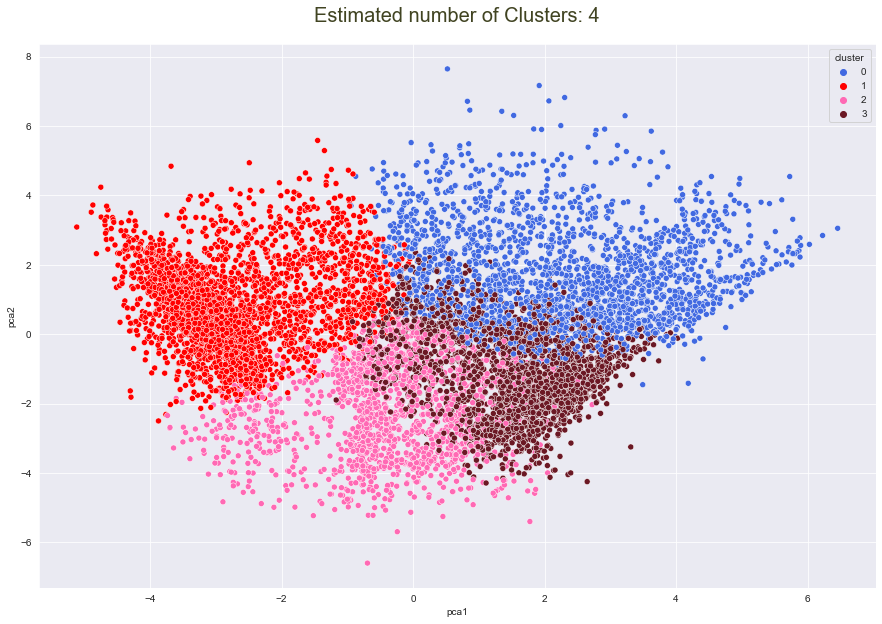

In [56]:
# Plot
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df,
                     palette = ['royalblue', 'red', 'hotpink', '#6b1824'])
                               
plt.title('Estimated number of Clusters: 4', fontsize = 20, color='#414422', y=1.03)
plt.show();

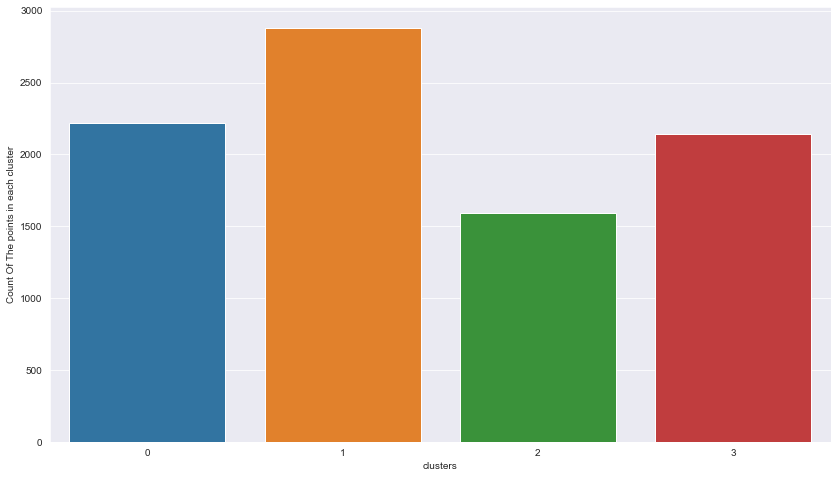

In [68]:
plt.figure(figsize=(14,8))
sns.countplot(labels)
plt.xlabel("clusters")
plt.ylabel("Count Of Points in each cluster")
plt.show()

Berdasarkan hasl model diatas, diambil kesimpulan bahwa Cluster yang terbaik dan yang saya pilih dengan elbow pada n=4.

**Analisis :**
1. First customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money. Cluster with lowest balance, lowest cash advance, and percentage of full payment = 23%.
2. Second customers cluster (Revolvers): who use credit card as a loan (most lucrative sector): highest balance and cash advance, low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%).
3. Third customers cluster (VIP/Prime): high credit limit $16,000, and highest percentage of full payment, target for increase credit limit and increase spending habits.
4. Fourth customers cluster (Low tenure): these are customers with low tenure (7 years), low balance.

# Model Inference

**Membuat data untuk model inference**

In [58]:
import random

testArray = []
predictArr = []
print("List of Tests:")
for i in range(5):
    featureArr = []
    for col in df.columns:
        featureArr.append(random.randint(round(df[col].describe()["25%"]), round(df[col].describe()["75%"])))
    print(featureArr)
    testArray.append(featureArr)

List of Tests:
[6, 1, 291, 4, 3, 5, 1, 0, 0, 0, 0, 2, 8, 7, 5, 0, 12]
[5, 1, 985, 0, 2, 5, 1, 0, 0, 0, 0, 2, 7, 7, 6, 0, 12]
[5, 1, 654, 6, 0, 5, 0, 0, 1, 0, 2, 1, 8, 6, 5, 0, 12]
[5, 1, 981, 5, 4, 0, 0, 0, 1, 0, 2, 1, 7, 7, 5, 0, 12]
[8, 1, 465, 6, 0, 2, 1, 0, 1, 0, 2, 2, 8, 8, 6, 0, 12]


In [60]:
scale = StandardScaler()
normalizeArr = scale.fit_transform(np.concatenate((np.asarray(df),testArray),axis=0))
normalizeArr.shape

(8835, 17)

In [61]:
dist = 1 - cosine_similarity(normalizeArr) 

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

In [62]:
X_PCA_Test = X_PCA[len(X_PCA)-5:]

In [63]:
x_test, y_test = X_PCA_Test[:, 0], X_PCA_Test[:, 1]

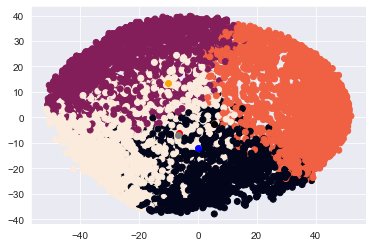

In [65]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
plt.scatter(x, y, c = kmeans.fit_predict(normalizeArr))
plt.scatter(x_test[0], y_test[0], c='red')
plt.scatter(x_test[1], y_test[1], c='blue')
plt.scatter(x_test[2], y_test[2], c='black')
plt.scatter(x_test[3], y_test[3], c='grey')
plt.scatter(x_test[4], y_test[4], c='orange')
plt.show()

# Overall Analysis

1. Terdapat missing value di variabel CREDIT_LIMIT (1 missing value) dan MINIMUM_PAYMENTS (313 missing value).
2. Tenure tertinggi yaitu 12 bulan.
3. Customer sering memperbaharui saldo yang mereka miliki.
4. Customer tidak sering melakukan pembelian.
5. Ada banyak skewness yang bervariasi pada data.
6. Variabel ONE OFF PURCHASE dengan PURCHASE memiliki korelasi tertinggi. 
7. Clustering menggunakan nilai n=4. 